In [2]:
import torch
import matplotlib.pyplot as plt
plt.style.use("dark_background")

DEVICE = "cpu"

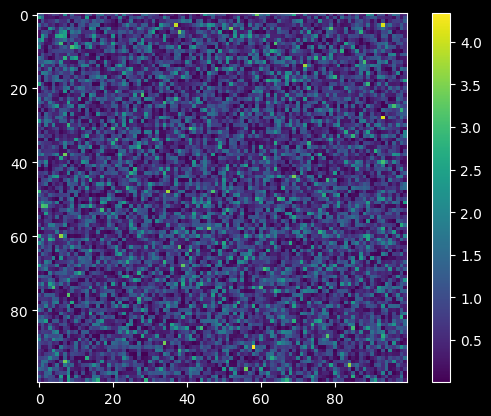

In [3]:
torch.manual_seed(0)
V = torch.randn(100, 100).abs().to(DEVICE)
plt.imshow(V)
plt.colorbar()

In [9]:
def nmf(V: torch.Tensor, k=10, max_iters=10_000, device="cpu", eps=1e-12):
	assert len(V.shape) == 2, "Must be a matrix"
	assert torch.allclose(V, V.abs()), "Must be non-negative"
	assert k > 0 and int(k) == k, "k must be positive integer"

	m, n = V.shape
	W = torch.randn((m, k)).to(device).abs()
	H = torch.randn((k, n)).to(device).abs()
	perf = []
	old_loss = None

	for i in range(max_iters):
		H *= W.T.matmul(V) / W.T.matmul(W).matmul(H)
		W *= V.matmul(H.T) / W.matmul(H).matmul(H.T)


		loss = torch.linalg.norm(V - W@H)
		perf.append(loss)

		if old_loss is None:
			old_loss = loss
		else:
			if torch.linalg.norm(old_loss - loss) < eps: break
			old_loss = loss

	
	plt.plot(perf)
	plt.ylabel("||V - WH|| error (lower the better)")
	plt.xlabel("Iterations")
	
	return W, H

Text(0.5, 1.0, 'Approximate A')

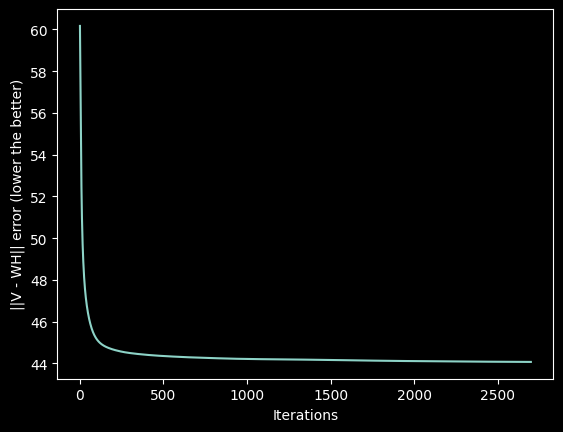

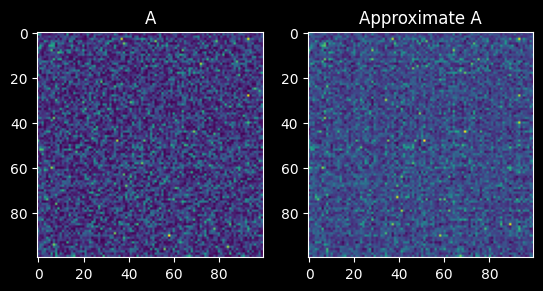

In [10]:
torch.manual_seed(0)
B, C = nmf(V, k=20)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(V)
axes[0].set_title("A")

axes[1].imshow(B@C)
axes[1].set_title("Approximate A")